### Investigating the appropriate scaling for each feature in the target vector ###

In [22]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
df = pd.read_csv("../data/smiles_and_targets.csv")

properties_names = ['A', 'B', 'C', 'mu', 'alfa', 'homo', 'lumo', 'gap', 'R²', 'zpve', 'U0', 'U', 'H', 'G', 'Cv']

targets = df[properties_names]
print("Number of samples in final dataset:", len(df))

Number of samples in final dataset: 132820


Characterize the distributions of the features

In [24]:
targets.describe()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv
count,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000
mean,3.365779,1.395758,1.117132,2.683599,75.240854,-0.240008,0.011289,0.251298,1188.422817,0.148748,-411.946590,-411.938115,-411.937171,-411.980005,31.631034
std,1.182539,0.437445,0.317488,1.438735,8.014609,0.021858,0.046864,0.047207,273.383329,0.033118,39.214154,39.213956,39.213956,39.214635,4.016353
min,0.000000,0.340580,0.334610,0.000000,26.440000,-0.396300,-0.175000,0.037600,242.930800,0.015951,-714.568050,-714.560200,-714.559200,-714.602100,10.398000
25%,2.551297,1.094428,0.911948,1.588400,70.427500,-0.252500,-0.023600,0.216500,1018.592475,0.125422,-437.914585,-437.906355,-437.905415,-437.948210,28.962000
50%,3.083955,1.371380,1.079445,2.495500,75.520000,-0.241000,0.012200,0.249600,1147.332850,0.148420,-417.922685,-417.915750,-417.914810,-417.954560,31.569000
75%,3.815260,1.654020,1.279422,3.626825,80.520000,-0.228700,0.049400,0.288300,1307.602325,0.171211,-387.055270,-387.046193,-387.045253,-387.089300,34.285000
max,9.992530,4.850850,4.732690,9.971700,119.230000,-0.125300,0.108200,0.480200,3374.753200,0.273944,-153.459840,-153.455440,-153.454500,-153.482620,46.969000


C:\Users\jespe\AppData\Local\Temp\ipykernel_15096\474093122.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = targets.hist(bins=25, ax=ax)


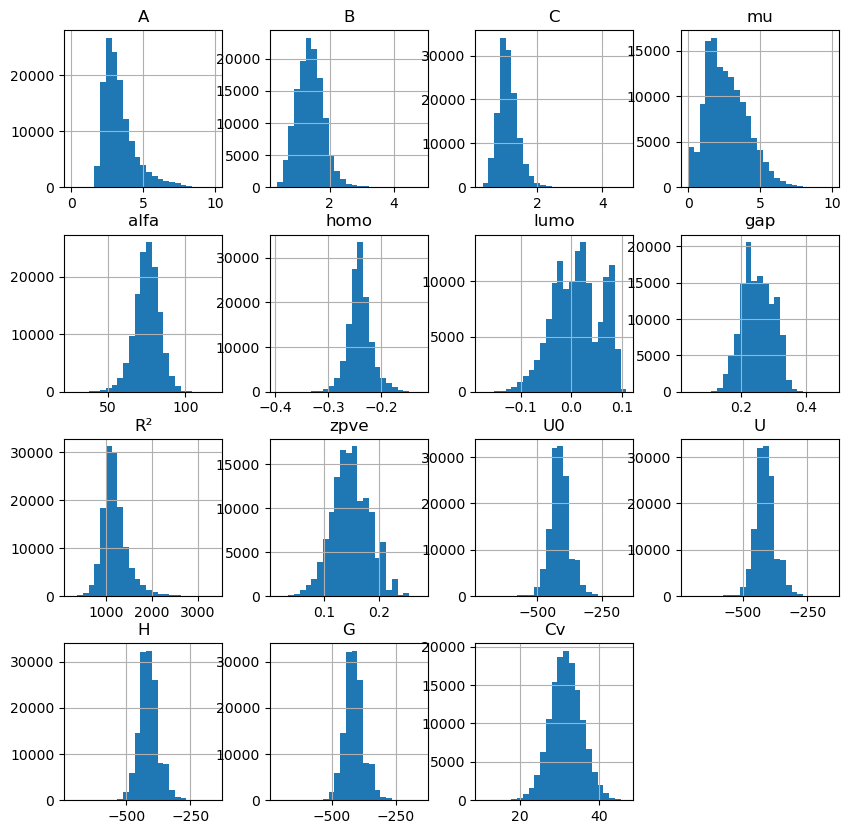

In [25]:
# plot histograms of values in each column
ax = plt.figure(figsize=(10,10))
hist = targets.hist(bins=25, ax=ax)

Scale the features and re-examine distirbutions after scaling

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

target_values = targets.values
print(target_values.shape)

target_values = scaler.fit_transform(target_values)

targets_scaled = targets.copy()
for idx, col_name in enumerate(properties_names):
    targets_scaled[col_name] = target_values[:,idx] 

print("First rows before scaling:")
print(targets.values[0:2,:])
print("First rows after scaling:")
print(targets_scaled.values[0:2,:])

(132820, 15)
First rows before scaling:
[[ 0.0000000e+00  4.4259725e+00  4.4259725e+00  0.0000000e+00
   3.8520000e+01 -2.5990000e-01 -2.1400000e-02  2.3860000e-01
   2.7862640e+02  3.7354000e-02 -1.5345984e+02 -1.5345544e+02
  -1.5345450e+02 -1.5348262e+02  1.5312000e+01]
 [ 0.0000000e+00  4.5793223e+00  4.5793223e+00  3.7920000e+00
   3.2660000e+01 -3.1020000e-01 -5.4300000e-02  2.5590000e-01
   2.6018960e+02  2.7259000e-02 -1.6955775e+02 -1.6955376e+02
  -1.6955283e+02 -1.6958102e+02  1.2930000e+01]]
First rows after scaling:
[[-2.84624113  6.92709459 10.42198207 -1.86525594 -4.58175731 -0.9100286
  -0.69753895 -0.26898075 -3.32792729 -3.36357542  6.59169448  6.59162388
   6.59162378  6.59188482 -4.06316306]
 [-2.84624113  7.27765342 10.90499383  0.77040246 -5.31292489 -3.21122486
  -1.39957389  0.09749482 -3.39536691 -3.66839724  6.18118019  6.18109706
   6.1810967   6.18136307 -4.65624072]]


C:\Users\jespe\AppData\Local\Temp\ipykernel_15096\1030398415.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = targets_scaled.hist(bins=25, ax=ax)


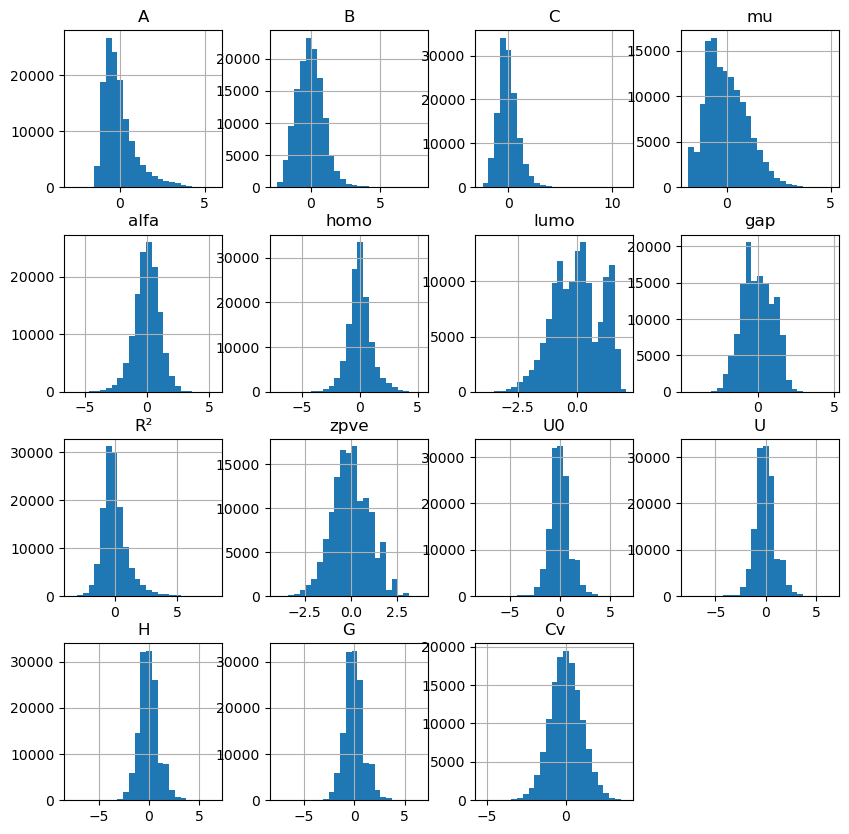

In [27]:
ax = plt.figure(figsize=(10,10))
hist = targets_scaled.hist(bins=25, ax=ax)